<a href="https://colab.research.google.com/github/delowerhossentuhin/CVPR/blob/main/MID/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount("/content/drive")
model = keras.models.load_model("/content/drive/MyDrive/Project and Coding/Computer Vision and Pattern Recognition/MNist --- Train and Test/mnist_model.keras")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_test = X_test.reshape(-1,28*28).astype("float32")/255.0
# X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

train_loss, train_acc = model.evaluate(X_test,Y_test)
print(train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0942
0.9771999716758728


---
# **Capture Image (two options)**


---






In [4]:
# --- Option A: Local Webcam (works in VS Code / Jupyter Notebook) ---
def capture_local_webcam():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return None
    ret, frame = cap.read()
    cap.release()
    if not ret:
        print("Failed to capture frame")
        return None
    cv2.imwrite("captured_digit.png", frame)
    return "captured_digit.png"

# --- Option B: Google Colab Webcam ---
def capture_colab_webcam():
    from IPython.display import display, Javascript
    from google.colab.output import eval_js
    from base64 import b64decode

    js = Javascript('''
        async function takePhoto() {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
    ''')
    display(js)
    data = eval_js('takePhoto()')
    binary = b64decode(data.split(',')[1])
    with open("captured_digit.png", 'wb') as f:
        f.write(binary)
    return "captured_digit.png"

---
# **Choose Environment**


---



In [5]:
try:
    from google.colab import drive
    is_colab = True
except ImportError:
    is_colab = False
if is_colab:
    filename = capture_colab_webcam()
else:
    filename = capture_local_webcam()
print("Image captured:", filename)

<IPython.core.display.Javascript object>

Image captured: captured_digit.png


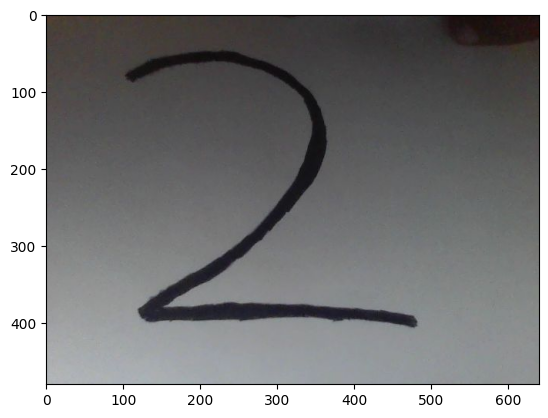

In [6]:
# Read raw image
raw_img = cv2.imread(filename)
raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
plt.imshow(raw_img_rgb)

---
# **Image Preprocessing**


---



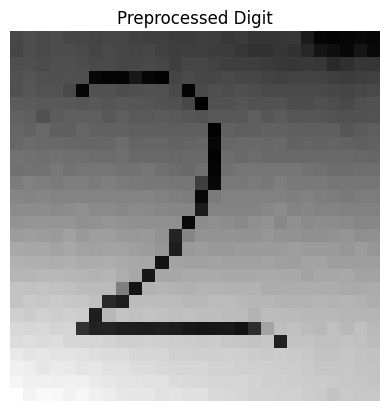

In [11]:
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)
img = img / 255.0
img = img.astype("float32")

img = img.reshape(1,784)
# img = img.reshape(1,28,28,1)

plt.imshow(img.reshape(28,28), cmap="gray_r")
plt.axis("off")
plt.title("Preprocessed Digit")
plt.show()

---
# **Prediction**


---



In [12]:
pred = model.predict(img)
digit = np.argmax(pred)
print("Predicted Digit:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Digit: 6
